In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import gaussian_kde
import pickle
import os
from PIL import Image

In [10]:
with open("./refineddataset/difficulties.json") as f:
    difficulties = json.load(f)

In [11]:
print(np.mean(list(difficulties.values())))
np.std(list(difficulties.values()))

0.0015873724338288091


1.3326771416144692

In [ ]:
def diff_scale_for_lung_image(nodules):
    # std of distrubution
    how_diff_difficulties = 

    # 

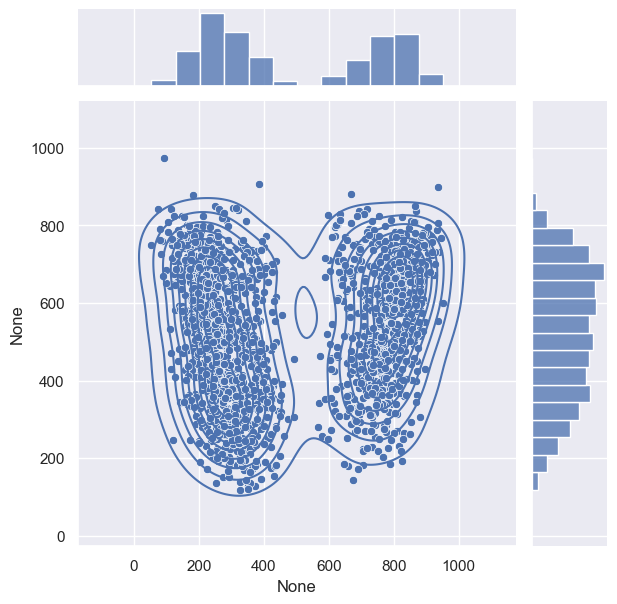

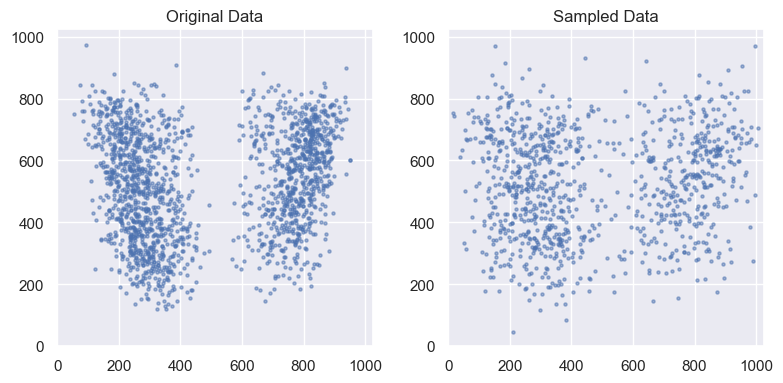

In [17]:
nodule_dict = {}

with open("things/nodules.json") as file:
    nodule_dict = json.load(file)

center_xs = []
center_ys = []

for k, v in nodule_dict.items():
    for nodule_meta in v:
        center_x = (nodule_meta[1][0] + nodule_meta[1][2]) / 2
        center_y = (nodule_meta[1][1] + nodule_meta[1][3]) / 2
        center_xs.append(center_x)
        center_ys.append(center_y)


x = np.array(center_xs)
y = np.array(center_ys)


sns.set_theme()

sns.jointplot(x=center_xs, y=center_ys).plot_joint(sns.kdeplot)
plt.show()

data = np.vstack([x, y])
kde = gaussian_kde(data)


def sample_dist(num_samples=1):
    samples = kde.resample(num_samples)
    return samples[0], samples[1]

sampled_x, sampled_y = sample_dist(1000)


plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.scatter(x, y, s=5, alpha=0.5)
plt.xlim(0, 1024)
plt.ylim(0, 1024)

plt.subplot(1, 2, 2)
plt.title("Sampled Data")
plt.scatter(sampled_x, sampled_y, s=5, alpha=0.5)
plt.xlim(0, 1024)
plt.ylim(0, 1024)

plt.tight_layout()
plt.show()
#this is for verification

In [19]:
j = 0
images = os.listdir("things/synthetic_nodules")
while(len(images) != 0):
    r_name = os.listdir("things/control_chest_xrays")[np.random.randint(low = 0, high = len(os.listdir("things/control_chest_xrays")))]
    size_batch = np.random.randint(low = 1, high = 4)
    if(len(os.listdir("things/synthetic_nodules")) <=3):
        size_batch = len(os.listdir("things/synthetic_nodules"))
    r = Image.open(f"things/control_chest_xrays/{r_name}").convert("RGBA")
    synthetic_image_names = images[:size_batch]
    for synthetic_image_name in synthetic_image_names:
        synthetic_image = Image.open(f"things/synthetic_nodules/{synthetic_image_name}").convert("RGBA")
        sample_x, sample_y = sample_dist()
        sample_x, sample_y = int(sample_x), int(sample_y)
        r.paste(synthetic_image, (sample_x - 256, sample_y - 256))
        images.remove(synthetic_image_name)

    r.save(f"things/synthetic_lung_images/s{j:06}.png")
    j+=1
    r.show()
    

C:\Users\aguin\AppData\Local\Temp\ipykernel_688448\1608158229.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sample_x, sample_y = int(sample_x), int(sample_y)
